In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to run all arguments and not just the last one
from IPython.display import Image
%matplotlib inline

In [3]:
# Ensemble modelling is about creating a class of classifiers which have a better predictive performance than
# the individual models. The book focusses on popular ensemble models that use the majority voting principle
# generalized to multi-class settings, majority vote method is called plural voting
from scipy.misc import comb
import math

In [8]:
def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier/2.0)
    probs = [comb(n_classifier, k) * error**k * (1 - error)**(n_classifier - k)
                for k in range(k_start, n_classifier + 1)]
    return sum(probs)

In [9]:
ensemble_error(n_classifier=11, error=.25)

0.034327507019042969

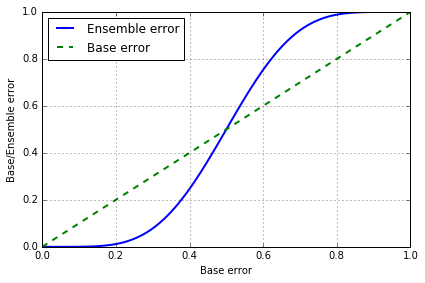

In [10]:
# we can compute the different ensemble error rates for a range of different base errors from 0 to 1 
import numpy as np

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
              for error in error_range]
import matplotlib.pyplot as plt

plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
# plt.savefig('./figures/ensemble_err.png', dpi=300)
plt.show()

# The ensemble always perform better than individual models as long as the base error is less than 50%

In [12]:
# Implimenting a majority vote classifier
# we can use the argmax and bincount functions in numpy
np.argmax(np.bincount([0, 0, 1], weights=[.2, .2, .6]))
# certain classifiers can also return probability of predicted classes which can be useful for majority voting

# to impliment majority vote based on class probabilities, we can again use 

1

In [13]:
?np.bincount